# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

**1.1. Импортируем библиотеку pandas. Прочитаем csv-файл в датафрейм и сохраним в переменную data**

In [1]:
import pandas as pd # импортируем библиотеку pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') # прочитаем csv-файл

**1.2. Выведем первые 20 строчек датафрейма data на экран.**

In [3]:
display(data.head(20))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


**1.3. Выведем основную информацию о датафрейме с помощью метода info().**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Вывод:**

Заметили следующее:


1. Всего в датафрейме 23 699 строк;
2. В столбцах есть нулевые значения (Изучем пропуски позже);
3. Не верный тип данных (Изучем и изменим тип данных позже). 

**1.4. Расчитаем описательную статистику для всего датафрейма**

In [5]:
print(data.describe())

       total_images    last_price    total_area         rooms  ceiling_height  \
count  23699.000000  2.369900e+04  23699.000000  23699.000000    14504.000000   
mean       9.858475  6.541549e+06     60.348651      2.070636        2.771499   
std        5.682529  1.088701e+07     35.654083      1.078405        1.261056   
min        0.000000  1.219000e+04     12.000000      0.000000        1.000000   
25%        6.000000  3.400000e+06     40.000000      1.000000        2.520000   
50%        9.000000  4.650000e+06     52.000000      2.000000        2.650000   
75%       14.000000  6.800000e+06     69.900000      3.000000        2.800000   
max       50.000000  7.630000e+08    900.000000     19.000000      100.000000   

       floors_total   living_area         floor  kitchen_area       balcony  \
count  23613.000000  21796.000000  23699.000000  21421.000000  12180.000000   
mean      10.673824     34.457852      5.892358     10.569807      1.150082   
std        6.597173     22.030445

**1.5. Построим гистограмму для всех числовых столбцов таблицы на одном графике.**

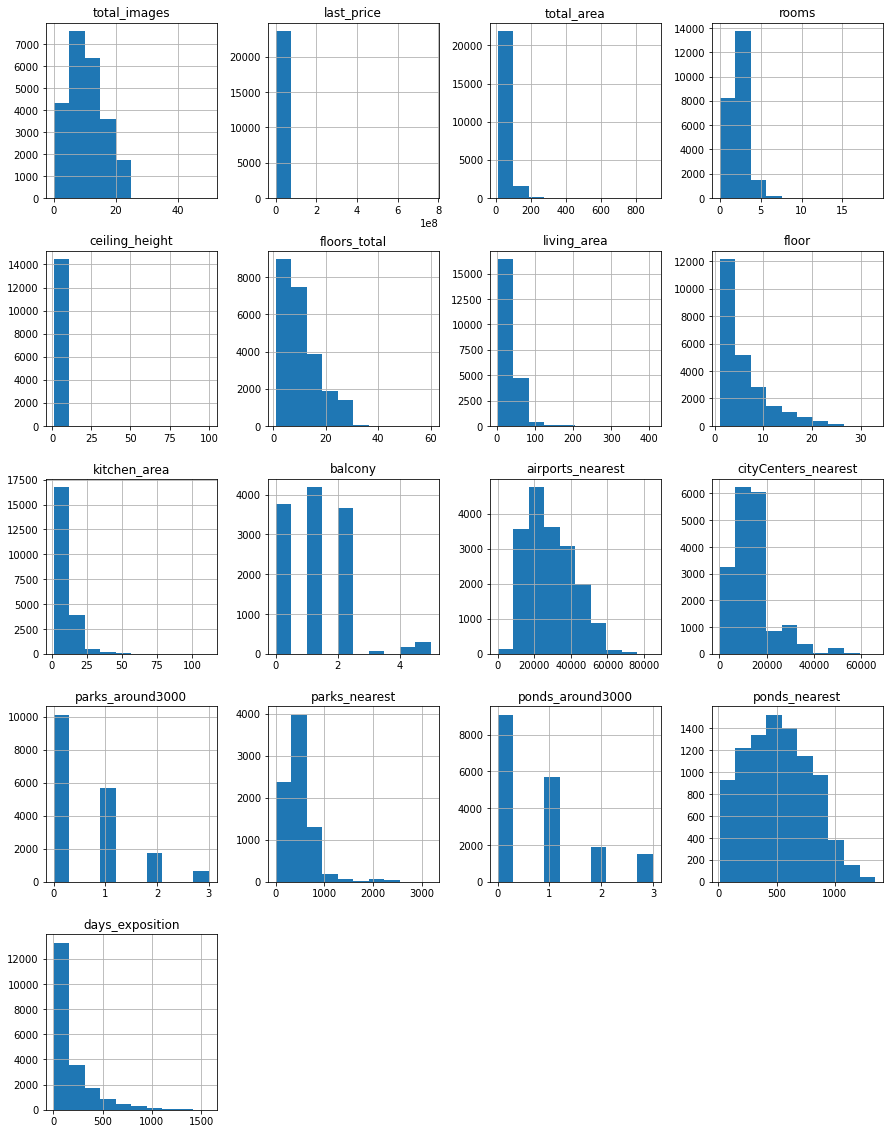

In [6]:
data.hist(figsize=(15, 20));


**Вывод:**
Из описательной статистики и графика заметили:
1. Высота потолков 'ceiling_height' до 100 м.;
2. Присутствуют квартиры с пятью балконами;
3. Большой разброс в 'days_exposition' от 1 - 1 580;
4. 19 комнат в квартире 'rooms'.

Есть небольшие анамалии, далее изучим подробно каждый столбец. 

### Предобработка данных

**Выведем количество пропущенных значений для каждого столбца**

In [7]:
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


**Изучим отдельно каждый столбец с пропущенными значениями - заполним пропуски, избавимся от дубликатов, изменим тип данных и т.д.**

**2.1. Предобработка 'ceiling_height'**

In [8]:
print(data['ceiling_height'].unique()) #Определим уникальные значения

[  2.7     nan   3.03   2.5    2.67   2.56   3.05   2.75   2.6    2.9
   2.8    2.55   3.     2.65   3.2    2.61   3.25   3.45   2.77   2.85
   2.64   2.57   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84
   3.1    2.34   3.4    3.06   2.72   2.54   2.51   2.78   2.76  25.
   2.58   3.7    2.52   5.2    2.87   2.66   2.59   2.     2.45   3.6
   2.92   3.11   3.13   3.8    3.15   3.55   3.16   3.62   3.12   2.53
   2.74   2.96   2.46   5.3    5.     2.79   2.95   4.06   2.94   3.82
   3.54   3.53   2.83   4.7    2.4    3.38   3.01   5.6    3.65   3.9
   3.18   3.35   2.3    3.57   2.48   2.62   2.82   3.98   2.63   3.83
   3.52   3.95   3.75   2.88   3.67   3.87   3.66   3.85   3.86   4.19
   3.24   4.8    4.5    4.2    3.36  32.     3.08   3.68   3.07   3.37
   3.09   8.     3.26   3.34   2.81   3.44   2.97   3.14   4.37   2.68
   3.22   3.27  27.     4.1    2.93   3.46  24.     3.47   3.33   3.63
   3.32  26.     1.2    8.3    2.98   2.86   3.17   4.4    3.28   3.04
   4.45   5

In [9]:
print(data['ceiling_height'].describe()) # Расчитаем описательную статистику

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


Присутствет большое количество пропущенных значений. Взаимосвязи не выявленно с другими столбцами с пропусками.
Медиана от среднего не сильно отличается (2,77 и 2,65), на фоне выбросов в выборке.
Изучив информацию о минимальной высоте стен, заполним пропущенные значения - 2,7 - этот показатель почти равен средней и медиане.

In [10]:
data['ceiling_height'] = data['ceiling_height'].fillna(2.7) #Заменяем пропуски на 2.7

Изучим квартиры с потолками менее 2,5 м. (Согласно СанПиН минимальная высота потолков - 2,5 м)


In [11]:
print('Процент квартир с потолками меньше 2,5 м: {:%}'.format(len(data[data['ceiling_height']<2.5]) / data['ceiling_height'].count()))

Процент квартир с потолками меньше 2,5 м: 0.308030%


Квартир с потолками меньше 2,5 м менее 1%. Удалим эти данные из датафрейма.

In [12]:
data = data.loc[data['ceiling_height']>=2.5] #Перезаполним столбец с потолками, что бы высота была от 2,5 и выше

In [13]:
#далее работаем с анамальными значениями
print(data[data['ceiling_height'] >= 25].head(40))

       total_images  last_price  total_area first_day_exposition  rooms  \
355              17   3600000.0        55.2  2018-07-12T00:00:00      2   
3148             14   2900000.0        75.0  2018-11-12T00:00:00      3   
4643              0   4300000.0        45.0  2018-02-01T00:00:00      2   
4876              7   3000000.0        25.0  2017-09-27T00:00:00      0   
5246              0   2500000.0        54.0  2017-10-13T00:00:00      2   
5669              4   4400000.0        50.0  2017-08-08T00:00:00      2   
5807             17   8150000.0        80.0  2019-01-09T00:00:00      2   
6246              6   3300000.0        44.4  2019-03-25T00:00:00      2   
9379              5   3950000.0        42.0  2017-03-26T00:00:00      3   
10773             8   3800000.0        58.0  2017-10-13T00:00:00      2   
11285             0   1950000.0        37.0  2019-03-20T00:00:00      1   
14382             9   1700000.0        35.0  2015-12-04T00:00:00      1   
17857             1   390

Высота потолков от 25-100 м.

Скорее всего, это ошибка при заполнении - потолок 25 м - это потолок 2,5 м.

Изменим это, разделив значения на 10

In [14]:
data.loc[(data['ceiling_height'] >= 25), 'ceiling_height'] = data['ceiling_height'] / 10
print(data['ceiling_height'].unique()) #Убедимся, что избавились от потолков > 25м. 

[ 2.7   3.03  2.5   2.67  2.56  3.05  2.75  2.6   2.9   2.8   2.55  3.
  2.65  3.2   2.61  3.25  3.45  2.77  2.85  2.64  2.57  4.15  3.5   3.3
  2.71  4.    2.73  2.84  3.1   3.4   3.06  2.72  2.54  2.51  2.78  2.76
  2.58  3.7   2.52  5.2   2.87  2.66  2.59  3.6   2.92  3.11  3.13  3.8
  3.15  3.55  3.16  3.62  3.12  2.53  2.74  2.96  5.3   5.    2.79  2.95
  4.06  2.94  3.82  3.54  3.53  2.83  4.7   3.38  3.01  5.6   3.65  3.9
  3.18  3.35  3.57  2.62  2.82  3.98  2.63  3.83  3.52  3.95  3.75  2.88
  3.67  3.87  3.66  3.85  3.86  4.19  3.24  4.8   4.5   4.2   3.36  3.08
  3.68  3.07  3.37  3.09  8.    3.26  3.34  2.81  3.44  2.97  3.14  4.37
  2.68  3.22  3.27  4.1   2.93  3.46 24.    3.47  3.33  3.63  3.32  8.3
  2.98  2.86  3.17  4.4   3.28  3.04  4.45  5.5   3.84  3.23  3.02  3.21
  3.43  3.78  4.3   3.39  2.69  3.31  4.65  3.56  3.51  3.93  3.42  2.99
  3.49 14.    4.14  2.91  3.88  4.25  3.29 20.    3.76  3.69  6.   22.6
  2.89  3.58  5.8   4.9   3.48 10.3  10.    3.59]


Остаются потолки выше 2,7 м.

Согласно СанПиН, потолки возвышаются до 4 м в элитных жилых комплексах, так же квартиры могут быть и двухуровневыми.

Проверим, сколько квартир выше 8 м.

In [15]:
print('Процент квартирс потолками большк 8 м: {:%}'.format(len(data[data['ceiling_height'] > 8.0]) / data['ceiling_height'].count()))

Процент квартирс потолками большк 8 м: 0.029628%


Таких квартир менее 1 %.

Удалим эти строки из таблицы

In [16]:
data = data.loc[data['ceiling_height'] <= 8.00]
print(data['ceiling_height'].unique())
data.info()

[2.7  3.03 2.5  2.67 2.56 3.05 2.75 2.6  2.9  2.8  2.55 3.   2.65 3.2
 2.61 3.25 3.45 2.77 2.85 2.64 2.57 4.15 3.5  3.3  2.71 4.   2.73 2.84
 3.1  3.4  3.06 2.72 2.54 2.51 2.78 2.76 2.58 3.7  2.52 5.2  2.87 2.66
 2.59 3.6  2.92 3.11 3.13 3.8  3.15 3.55 3.16 3.62 3.12 2.53 2.74 2.96
 5.3  5.   2.79 2.95 4.06 2.94 3.82 3.54 3.53 2.83 4.7  3.38 3.01 5.6
 3.65 3.9  3.18 3.35 3.57 2.62 2.82 3.98 2.63 3.83 3.52 3.95 3.75 2.88
 3.67 3.87 3.66 3.85 3.86 4.19 3.24 4.8  4.5  4.2  3.36 3.08 3.68 3.07
 3.37 3.09 8.   3.26 3.34 2.81 3.44 2.97 3.14 4.37 2.68 3.22 3.27 4.1
 2.93 3.46 3.47 3.33 3.63 3.32 2.98 2.86 3.17 4.4  3.28 3.04 4.45 5.5
 3.84 3.23 3.02 3.21 3.43 3.78 4.3  3.39 2.69 3.31 4.65 3.56 3.51 3.93
 3.42 2.99 3.49 4.14 2.91 3.88 4.25 3.29 3.76 3.69 6.   2.89 3.58 5.8
 4.9  3.48 3.59]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23619 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  ----

**Итог:**

Оставили квартиры с потолками 2,5 - 8,0 м. Тип данных не меняем, т.к. числа с плавающей точкой.

**2.2. Предобработка 'balcony'**

In [17]:
print(data['balcony'].unique()) #Определим уникальные значения
print(data['balcony'].value_counts())

[nan  2.  0.  1.  5.  4.  3.]
1.0    4170
0.0    3752
2.0    3648
5.0     300
4.0     183
3.0      79
Name: balcony, dtype: int64


Заполним пропущенные значения на 0.

Скорее всего, пропуски - это отсутствие балкона. Не заполнение данных на платформе/сайте должно было автоматически проставить 0, либо прописать 'без балкона'. Но данные выгрузились в таком формате.

Пропуски не звязаны с этажностью.

Наличие пяти балконов не считаем анамалией, т.к. такое количество балконов возможно и будет считаться, для кого-то, преимуществом при покупке квартиры. К тому же такиз квартир 300. Оставим данные как есть.

Изменим тип данных на int, т.к. балкон - целое число.


In [18]:
data['balcony'] = data['balcony'].fillna(0).astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23619 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23619 non-null  int64  
 1   last_price            23619 non-null  float64
 2   total_area            23619 non-null  float64
 3   first_day_exposition  23619 non-null  object 
 4   rooms                 23619 non-null  int64  
 5   ceiling_height        23619 non-null  float64
 6   floors_total          23533 non-null  float64
 7   living_area           21722 non-null  float64
 8   floor                 23619 non-null  int64  
 9   is_apartment          2761 non-null   object 
 10  studio                23619 non-null  bool   
 11  open_plan             23619 non-null  bool   
 12  kitchen_area          21349 non-null  float64
 13  balcony               23619 non-null  int64  
 14  locality_name         23570 non-null  object 
 15  airports_nearest   

**Итог:**

Заменили пропуски на 0, изменили тип данных.

**2.3. Предобработка 'floors_total '**

In [19]:
print(data['floors_total'].unique())
print(data['floors_total'].value_counts())

[16. 11.  5. 14. 12. 26. 24. 27.  9.  6. 17. 25.  3. 23. 19. 18.  4. 22.
  8.  2. 10.  7. 13. 15. nan 20. 28. 36. 21. 35. 34. 60.  1. 29. 33. 52.]
5.0     5753
9.0     3751
16.0    1373
12.0    1355
4.0     1198
10.0    1173
25.0    1075
6.0      911
17.0     831
3.0      668
7.0      591
14.0     549
18.0     504
24.0     469
8.0      388
2.0      379
15.0     364
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     202
27.0     164
21.0     158
26.0     124
35.0      24
1.0       23
28.0      21
36.0       3
29.0       1
60.0       1
52.0       1
34.0       1
33.0       1
Name: floors_total, dtype: int64


Взаимосвязи с другими пропусками нет. Возможно при заполнении не заполнили данную строку, т.к. есть строка 'floor'.

Пропусков менее 1%, запоним данные 0, для дальнейшего анализа и изменения типа данных.

Изменим тип даннх на int, т.к. этажи - целое число.

In [20]:
data['floors_total'] = data['floors_total'].fillna(0).astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23619 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23619 non-null  int64  
 1   last_price            23619 non-null  float64
 2   total_area            23619 non-null  float64
 3   first_day_exposition  23619 non-null  object 
 4   rooms                 23619 non-null  int64  
 5   ceiling_height        23619 non-null  float64
 6   floors_total          23619 non-null  int64  
 7   living_area           21722 non-null  float64
 8   floor                 23619 non-null  int64  
 9   is_apartment          2761 non-null   object 
 10  studio                23619 non-null  bool   
 11  open_plan             23619 non-null  bool   
 12  kitchen_area          21349 non-null  float64
 13  balcony               23619 non-null  int64  
 14  locality_name         23570 non-null  object 
 15  airports_nearest   

**Итог:**

Заменили пропуски на 0. Изменили тип данных на int.

**2.4. Предобработка 'is_apartment'**

Столбец аппартаменты содержит много пропущенных значений, судя по годам, данные по аппартаментам заполнялись не с самого начала. Заполним пропущенные значения на False.

In [21]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23619 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23619 non-null  int64  
 1   last_price            23619 non-null  float64
 2   total_area            23619 non-null  float64
 3   first_day_exposition  23619 non-null  object 
 4   rooms                 23619 non-null  int64  
 5   ceiling_height        23619 non-null  float64
 6   floors_total          23619 non-null  int64  
 7   living_area           21722 non-null  float64
 8   floor                 23619 non-null  int64  
 9   is_apartment          23619 non-null  bool   
 10  studio                23619 non-null  bool   
 11  open_plan             23619 non-null  bool   
 12  kitchen_area          21349 non-null  float64
 13  balcony               23619 non-null  int64  
 14  locality_name         23570 non-null  object 
 15  airports_nearest   

**Итог:**

Заменили пропуски на False, тип данных автоматически поменялся на bool.


**2.5. Предобработка 'area'**

Столбец  'total_area' заполнен и не имеет пропущенных значений, тип данных float, т.к. площадь указана не в целых числах.

Столбцы 'living_area' и 'kitchen_area' содержат пропущенные значения, около 9-10 %

Можно посчитать средний процент жилой площади и площади кухни от всей площади по выборке, и высчитать жилую площадь и площадь кухни для строк с пропусками, но данные по общай площади разнятся от 12 - 900, жилая площадь от 2 - 409. При заполнении средним или медианой, площадь кухни или жилая могут оказаться больше, чем общая площадь.

Столбцы оставим без изменения, тип данных не меняем. Если в дальнейшем потребуется сравнение, проведём отдельную обработку.

**2.6. Предобработка 'locality_name'**

Причина пропущенных значений не понятна, взаимосвязей с другими столбцами с пропусками не выявлена.

Пропущенные значения составляют менее 1%.

Можно оставить строки пустыми, или удалить, но мы их заполним, чтобы не было пропусков

Заполним пустоты - 'без названия'. Для дальнейшей работы и возможного заполнения.

In [22]:
#data['locality_name'] = data['locality_name'].fillna('без названия')
#print(data[data['locality_name'] == 'без названия'])
data.dropna(subset=['locality_name'], inplace=True )
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23570 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23570 non-null  int64  
 1   last_price            23570 non-null  float64
 2   total_area            23570 non-null  float64
 3   first_day_exposition  23570 non-null  object 
 4   rooms                 23570 non-null  int64  
 5   ceiling_height        23570 non-null  float64
 6   floors_total          23570 non-null  int64  
 7   living_area           21678 non-null  float64
 8   floor                 23570 non-null  int64  
 9   is_apartment          23570 non-null  bool   
 10  studio                23570 non-null  bool   
 11  open_plan             23570 non-null  bool   
 12  kitchen_area          21309 non-null  float64
 13  balcony               23570 non-null  int64  
 14  locality_name         23570 non-null  object 
 15  airports_nearest   

Приведём значения столбца к единому виду - оставим только название, без города, пгт, села и тд. Так, в дальнейшем будет легче анализировать информацию.


In [23]:
data['locality_name'] = (data['locality_name']
                         .replace('посёлок ', '', regex=True)
                         .replace('городской ', '', regex=True)
                         .replace('деревня ', '', regex=True)
                         .replace('поселок ', '', regex=True)
                         .replace('городского ', '', regex=True)
                         .replace('типа ', '', regex=True)
                         .replace('садовое товарищество ', '', regex=True)
                         .replace('село ', '', regex=True)
                         .replace('имени ', '', regex=True)
                         .replace('станции ', '', regex=True)
                         .replace('садоводческое некоммерческое товарищество ', '', regex=True)
                         .replace('при железнодорожной ', '', regex=True)
                         .replace('коттеджный ', '', regex=True)
                         .replace('Пансионат ', '', regex=True)
                                                  
)

print(data['locality_name'].unique())

['Санкт-Петербург' 'Шушары' 'Янино-1' 'Парголово' 'Мурино' 'Ломоносов'
 'Сертолово' 'Петергоф' 'Пушкин' 'Кудрово' 'Коммунар' 'Колпино'
 'Красный Бор' 'Гатчина' 'Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'Новое Девяткино' 'Металлострой' 'Лебяжье' 'Сиверский' 'Молодцово'
 'Кузьмоловский' 'Новая Ропша' 'Павловск' 'Пикколово' 'Всеволожск'
 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк' 'Куттузи' 'Аннино'
 'Ефимовский' 'Плодовое' 'Заклинье' 'Торковичи' 'Первомайское'
 'Красное Село' 'Понтонный' 'Сясьстрой' 'Старая' 'Лесколово' 'Сланцы'
 'Путилово' 'Ивангород' 'Шлиссельбург' 'Никольское' 'Зеленогорск'
 'Сосновый Бор' 'Новый Свет' 'Оржицы' 'Кальтино' 'Романовка' 'Бугры'
 'Рощино' 'Кириши' 'Луга' 'Волосово' 'Отрадное' 'Павлово' 'Оредеж'
 'Копорье' 'Молодёжное' 'Тихвин' 'Победа' 'Нурма' 'Синявино' 'Тосно'
 'Стрельна' 'Бокситогорск' 'Александровская' 'Лопухинка' 'Пикалёво'
 'Терволово' 'Советский' 'Подпорожье' 'Петровское' 'Токсово' 'Сельцо'
 'Вырица' 'Кипень' 'Келози' 'Вартемяги' 'Тельмана' '

**Итог:**

Привели значения столбца к единому виду, пропуски заполнили - 'без названия'.

**2.9. Предобработка 'days_exposition'**

In [24]:
data['days_exposition'] = np.floor(pd.to_numeric(data['days_exposition'], errors='coerce')).astype('Int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23570 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23570 non-null  int64  
 1   last_price            23570 non-null  float64
 2   total_area            23570 non-null  float64
 3   first_day_exposition  23570 non-null  object 
 4   rooms                 23570 non-null  int64  
 5   ceiling_height        23570 non-null  float64
 6   floors_total          23570 non-null  int64  
 7   living_area           21678 non-null  float64
 8   floor                 23570 non-null  int64  
 9   is_apartment          23570 non-null  bool   
 10  studio                23570 non-null  bool   
 11  open_plan             23570 non-null  bool   
 12  kitchen_area          21309 non-null  float64
 13  balcony               23570 non-null  int64  
 14  locality_name         23570 non-null  object 
 15  airports_nearest   

**Итог:**

Пропуски не заполнили, т.к. это означает, что квартира ещё не продана. Изменили тип данных на int.

**2.10. Предобработка 'first_day_exposition'**

Переведем столбец с датой публикации в формат даты без времени, т.к. время не указано, изменим тип данных на datetime.

In [25]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23570 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23570 non-null  int64         
 1   last_price            23570 non-null  float64       
 2   total_area            23570 non-null  float64       
 3   first_day_exposition  23570 non-null  datetime64[ns]
 4   rooms                 23570 non-null  int64         
 5   ceiling_height        23570 non-null  float64       
 6   floors_total          23570 non-null  int64         
 7   living_area           21678 non-null  float64       
 8   floor                 23570 non-null  int64         
 9   is_apartment          23570 non-null  bool          
 10  studio                23570 non-null  bool          
 11  open_plan             23570 non-null  bool          
 12  kitchen_area          21309 non-null  float64       
 13  balcony         

**2.11. Предобработка 'last_price'**

Изменим цену на тип данных int, для удобного просмотра.

In [26]:
data['last_price'] = data['last_price'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23570 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23570 non-null  int64         
 1   last_price            23570 non-null  int64         
 2   total_area            23570 non-null  float64       
 3   first_day_exposition  23570 non-null  datetime64[ns]
 4   rooms                 23570 non-null  int64         
 5   ceiling_height        23570 non-null  float64       
 6   floors_total          23570 non-null  int64         
 7   living_area           21678 non-null  float64       
 8   floor                 23570 non-null  int64         
 9   is_apartment          23570 non-null  bool          
 10  studio                23570 non-null  bool          
 11  open_plan             23570 non-null  bool          
 12  kitchen_area          21309 non-null  float64       
 13  balcony         

**2.11. Предобработка 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'parks_nearest', 'ponds_around3000','ponds_nearest'.**

Пропуски в данных столбцах территориальные. Можно конечно заполнить средним значение по названиям местностей, но, если в дальнейшем, эти данные нам не понадобятся, оставим столбцы без изменений.

Скорее всего, пропуски связаны с невозможность физически заполнить такие данные - либо рядом не пруда, либо нет возможности измерить расстояние и т.д. Да, заполненные данные - это преимущество, но не критичное.

**Итог по предобработке данных:**

**1. Определили, в каких столбцах есть пропуски.**

**2. Заполнили пропущенные значения там, где это возможно. Часть строк удалили и часть оставили без изменений.**

**3. Рассмотрели и изменили тип данных, где это было необходимо.**

**4. Изучили уникальные значения в столбце с названиями и устранили неявные дубликаты.**


### Добавьте в таблицу новые столбцы со следующими параметрами:

**3.1. Цена одного квадратного метра.**

In [27]:
# Поделим стоимость объекта на его общую площадь 
data['price_per_square_meter'] = data['last_price'] / data['total_area']
# Округлим до двух знаков после запятой
data['price_per_square_meter'] = data['price_per_square_meter'].round(2)
print(data)

       total_images  last_price  total_area first_day_exposition  rooms  \
0                20    13000000      108.00           2019-03-07      3   
1                 7     3350000       40.40           2018-12-04      1   
2                10     5196000       56.00           2015-08-20      2   
3                 0    64900000      159.00           2015-07-24      3   
4                 2    10000000      100.00           2018-06-19      2   
...             ...         ...         ...                  ...    ...   
23694             9     9700000      133.81           2017-03-21      3   
23695            14     3100000       59.00           2018-01-15      3   
23696            18     2500000       56.70           2018-02-11      2   
23697            13    11475000       76.75           2017-03-28      2   
23698             4     1350000       32.30           2017-07-21      1   

       ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0                2.70

**3.2. День недели публикации объявления.**

In [28]:
# Создадим столбец 'weekday_exposition' 
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

**3.3. Месяц публикации объявления.**

In [29]:
# Создадим столбец 'month_exposition'
data['month_exposition'] = data['first_day_exposition'].dt.month

**3.4. Год публикации объявления.**

In [30]:
# Создадим столбец 'year_exposition'
data['year_exposition'] = data['first_day_exposition'].dt.year

**3.5. Тип этажа квартиры.** 

In [31]:
# Напишем функцию категоризации по этажам, используя метод apply
def floor_type(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
    
data['floor_type'] = data.apply(floor_type, axis = 1)  
print(data.head(5))
data.info()

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20    13000000       108.0           2019-03-07      3   
1             7     3350000        40.4           2018-12-04      1   
2            10     5196000        56.0           2015-08-20      2   
3             0    64900000       159.0           2015-07-24      3   
4             2    10000000       100.0           2018-06-19      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0            2.70            16         51.0      8         False  ...   
1            2.70            11         18.6      1         False  ...   
2            2.70             5         34.3      4         False  ...   
3            2.70            14          NaN      9         False  ...   
4            3.03            14         32.0     13         False  ...   

   parks_around3000  parks_nearest  ponds_around3000  ponds_nearest  \
0               1.0          482.0               2.0     

**3.6. Расстояние до центра города в километрах.**

In [32]:
# Переводим значения в км
data['cityCenters_nearest'] = data['cityCenters_nearest'] / 1000
# Округляем до ближайших целых значений
data['cityCenters_nearest'] = round(data['cityCenters_nearest'])

### Проведите исследовательский анализ данных

**Изучите перечисленные ниже параметры объектов и постройте отдельные гистограммы для каждого из этих параметров.**

**4.1. Изучим общую площадь.**

count    23570.000000
mean        60.369424
std         35.704916
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


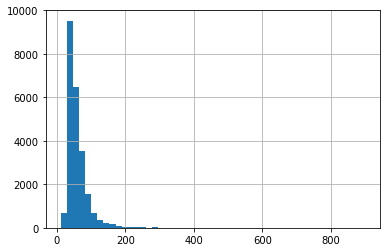

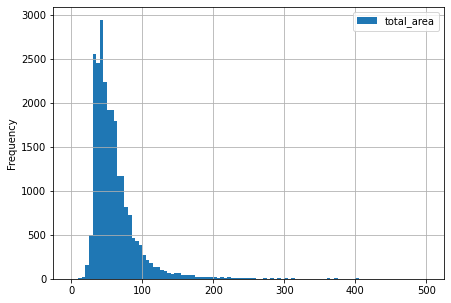

In [33]:
# Построим гистограмму двумя способами
print(data['total_area'].describe())
print(data['total_area'].hist(bins=50));
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (7,5), range = (0,500));

Есть выбросы после 200 м2. Квартир с такой площадью практически нет. Удалим эти выбросы.

count    23343.000000
mean        58.188790
std         26.543082
min         12.000000
25%         40.000000
50%         51.900000
75%         69.000000
max        200.000000
Name: total_area, dtype: float64


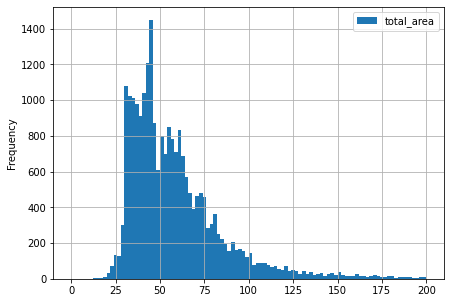

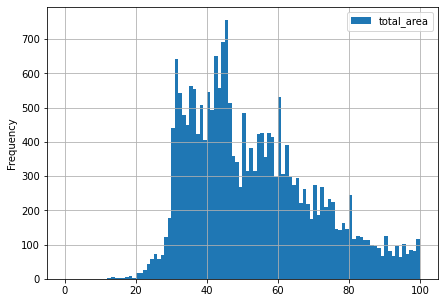

In [34]:
# Оставим площадь менее 200 м2
data = data[data['total_area'] <= 200]

#Обновим график и describe()
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (7,5), range = (0,200));
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (7,5), range = (0,100));
print(data['total_area'].describe())


Общая площадь в выборке от 12 до 200 м2, среднее значение 58 м2, медиана 51 м2.

От выбросов избавились.

Больше всего квартир с площадью от 30 до 45 м2

**4.2. Изучим жилую площадь.**

count    21479.000000
mean        33.253058
std         17.379839
min          2.000000
25%         18.600000
50%         30.000000
75%         42.000000
max        164.700000
Name: living_area, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


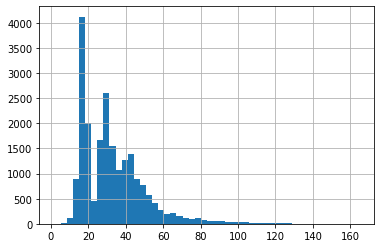

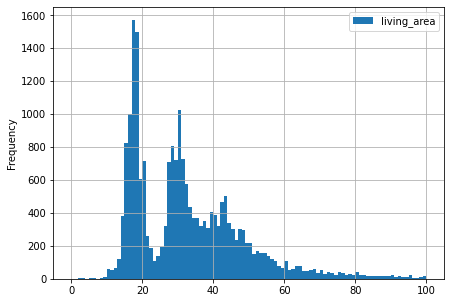

In [35]:
print(data['living_area'].describe())
print(data['living_area'].hist(bins=50));
data.plot(y = 'living_area', kind = 'hist', bins = 100, grid=True, figsize = (7,5), range = (0,100));


Распределение данных нормальное, есть небольшие выбросы, на фоне большой общей площади, которые не влияют на данные.

Жилая площадь в выборке 2 - 164 м2. Больше всего квартир с жилой площадью 18-19 м2. 

Выбросы не удаляем.


**4.3. Изучим площадь кухни**

count    21111.000000
mean        10.390983
std          5.370524
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max         93.200000
Name: kitchen_area, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


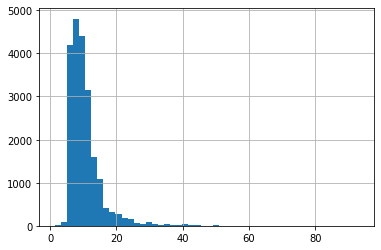

In [36]:
print(data['kitchen_area'].describe())
print(data['kitchen_area'].hist(bins=50));

Распределение данных нормальное. Площадь колеблется от 1,3 до 93 м2. Средняя площадь кухни 10 м2.

**4.4. Изучим цену объекта.**

[13000000  3350000  5196000 ...  6151120 21400000 11475000]
count    2.334300e+04
mean     6.031786e+06
std      6.248975e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.700000e+06
max      3.300000e+08
Name: last_price, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


<AxesSubplot:ylabel='Frequency'>

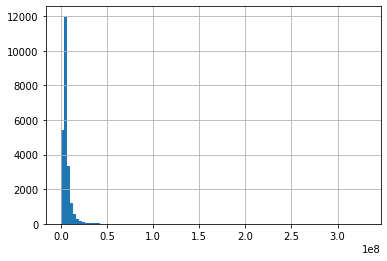

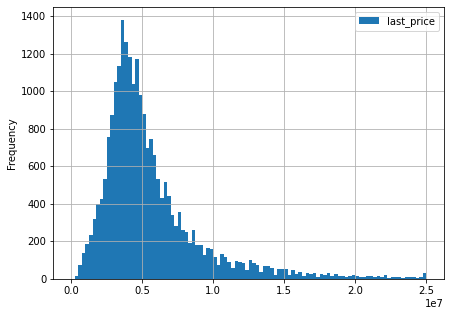

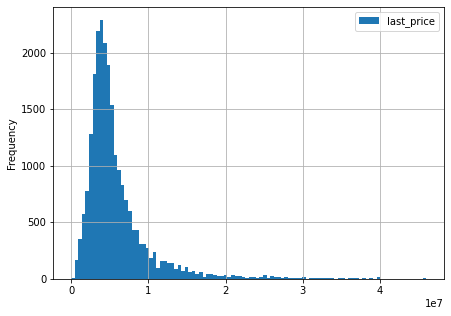

In [37]:
#data['last_price'] = data['last_price']
print(data['last_price'].unique())
print(data['last_price'].describe())

print(data['last_price'].hist(bins = 100));
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range = (0,25000000), figsize = (7,5))
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range = (0,46000000), figsize = (7,5))


Имеются выбросы после 20 млн руб. Избавимся от них, т.к. квартир с такой стоимостью мало.

count    2.282200e+04
mean     5.406655e+06
std      3.187452e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.550000e+06
75%      6.500000e+06
max      2.000000e+07
Name: last_price, dtype: float64


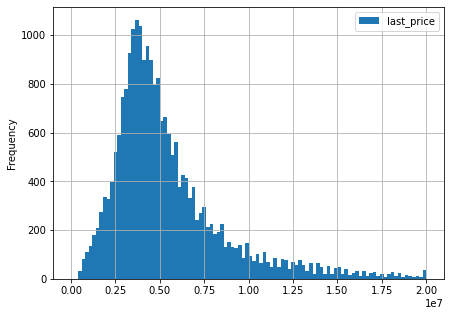

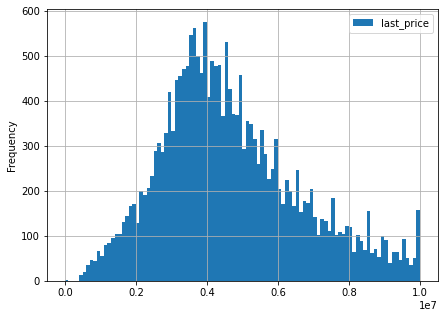

In [38]:
# Оставим цену меньше 20 млн. руб
data = data[data['last_price'] <= 20000000]
print(data['last_price'].describe())

data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range = (0,20000000), figsize = (7,5));
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range = (0,10000000), figsize = (7,5));

Распределение данных нормальное (Гаусса). Средняя цена квартиры 5,4 млн руб. Больше всего объявлений за 3-5 млн руб.

**4.5. Изучим количество комнат**

count    22822.000000
mean         2.003023
std          0.971140
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


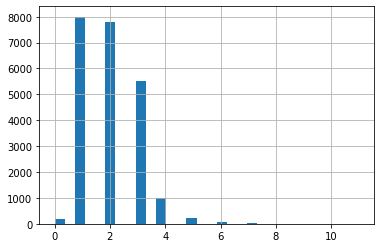

In [39]:
print(data['rooms'].describe())
print(data['rooms'].hist(bins=30))

Имеютя выбросы после 4 комнат и выше, так же квартиры с 0 комнат. Избавимся от этих выбросов.

count    2.234100e+04
mean     5.346007e+06
std      3.095043e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.550000e+06
75%      6.400000e+06
max      2.000000e+07
Name: last_price, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


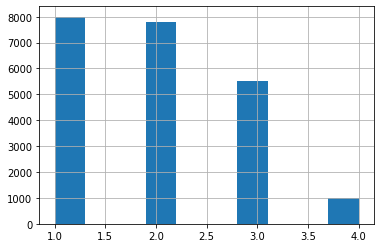

In [40]:
data = data[data['rooms'] <= 4]
data = data[data['rooms'] > 0]
print(data['last_price'].describe())
print(data['rooms'].hist(bins=10));

Больше всего объявлений с 1 и 2 комнатными квартирами. Квартиры с 4 комнатами попадаются в 8 раз реже.

**4.6. Изучим высоту потолков.**

count    22341.000000
mean         2.703495
std          0.201670
min          2.500000
25%          2.600000
50%          2.700000
75%          2.700000
max          8.000000
Name: ceiling_height, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


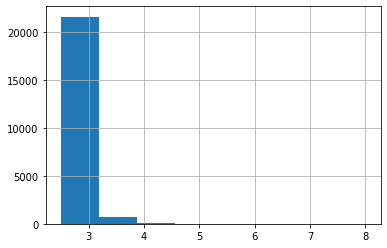

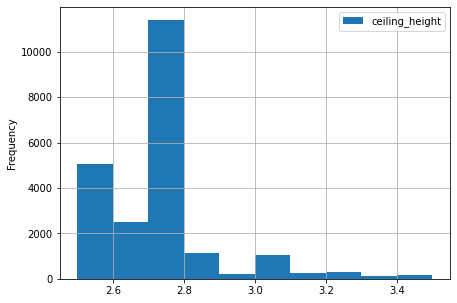

In [41]:
print(data['ceiling_height'].describe())
print(data['ceiling_height'].hist(bins=8))
data.plot(y = 'ceiling_height', kind = 'hist', bins = 10, grid=True, figsize = (7,5), range=(2.5,3.5));


Высота потолков от 2,5 до 8 м. Больше всего квартир с высотой стен 2,7 м., Реже встречаюся квартиры с высотой потолков больше 3 м.

**4.7. Изучим тип этажа квартиры («первый», «последний», «другой»)**

AxesSubplot(0.125,0.125;0.775x0.755)


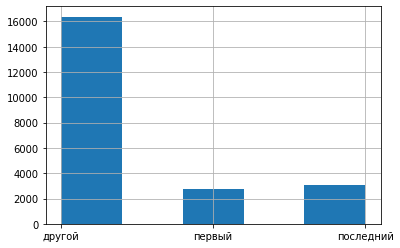

In [42]:
print(data['floor_type'].hist(bins=5));

Больше всего объявлений с квартирой не на первом и не на последнем этажах. В предобработке даных пропуски заполнили - 0, который попал в тип "другой", т.к. этих данных было менее 1 %, это не сильно повлияло на гистограмму. Объявлений с квартирой на первом этаже чуть меньше, чем на последнем.

**4.8. Изучим общее количество этажей в доме.**

count    22341.000000
mean        10.717157
std          6.632884
min          0.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


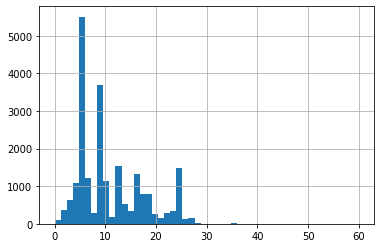

In [43]:
print(data['floors_total'].describe())
print(data['floors_total'].hist(bins=50));

В объявлениях представлены квартиры с этажностью дома от 0 до 60 этажа.

0 этаж - это заполненные строки с пустыми значениями, не влияют на данные, т.к составляют менее 1%, удалять не будем.

Больше всего объявлений в пятиэтажных домах. На счёт домов выше 30 этажа нужно уточнить и проверить информацию.

**4.9. Изучим расстояние до центра города в метрах.**

AxesSubplot(0.125,0.125;0.775x0.755)


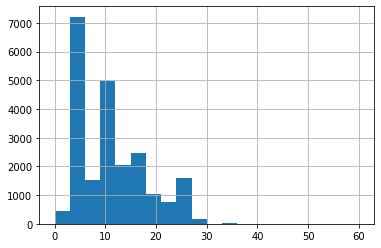

In [44]:
print(data['floors_total'].hist(bins=20));

Расстояние до центра города в пределах 0-30 км.**
Больше всего объявлений, где расстояние до ценра  около 5 км. Возможно, Чем дальше от центра, тем меньше объявлений или упоминания об растоянии. Либо, если это объявление в области, то там нет необходимости указавать данный параметр.

**4.10. Изучим расстояние до ближайшего парка.**

count    7314.000000
mean      495.139732
std       343.698750
min         1.000000
25%       290.000000
50%       458.000000
75%       617.000000
max      3190.000000
Name: parks_nearest, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


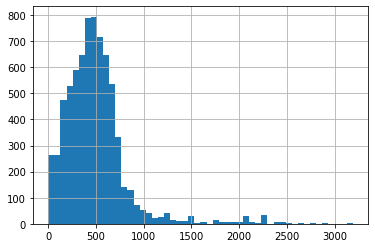

In [45]:
print(data['parks_nearest'].describe())
print(data['parks_nearest'].hist(bins=50));

Не во всех объявлениях было указано о наличии пруда. В среднем, водоём расположен примерно в 500 м от дома. Так же есть объявления, где указывали расстояние до пруда, если он находится дальше чем 1 км.

**Вывод по исследовательскому анализу данных на основе гистограмм:**

**В данных встречаются аномалии - 19 комнат, цена квартиры больше 40-50 млн, рублей, площадь квартиры больше 200 м2. От всех выбросов избавились и проанализировали нормальные значения.**

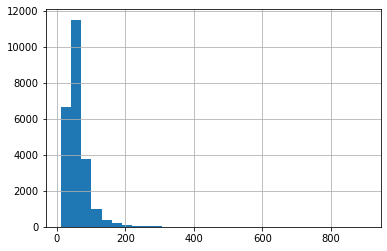

In [46]:
#проверка аномалий
data2 = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
(data2['total_area']).hist(bins=30);

**Задание 1 - "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление".**

<AxesSubplot:ylabel='Frequency'>

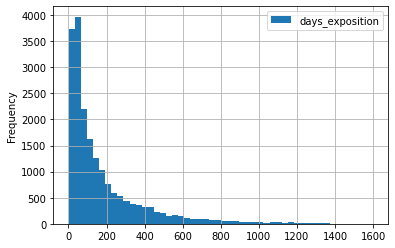

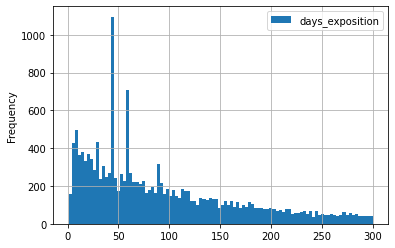

In [47]:
#import matplotlib.pyplot as plt #импортируем библиотеку для визуализации данных. 
#Без неё график не строился. Импортирую тут, т.к. ранее мы не знали, что она понадобится.
#print(data[data['days_exposition']!=0]['days_exposition'].describe()) #исключаем 0 дней
#plt.boxplot(data['days_exposition']) # Нарисуем диаграмму размаха

data.plot(y = 'days_exposition', kind = 'hist', bins = 50, grid = True, range = (1,1600))
#Посмотрим диапазон(1,300)
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,300))

Проверим уникальные значения, т.к. есть выбросы в районе 40 дней, 60 и 80-90.

In [48]:
print(data['days_exposition'].value_counts().head(10))


45    859
60    531
7     225
30    197
4     169
90    163
3     152
14    141
5     140
20    136
Name: days_exposition, dtype: Int64


0 ней - это наша замена. Возможно, что тут бы пригодило удалить эти данные, но, т.к. мы знаем, что это пустые значения, оставим их и проанализируем.

Уникальные значения - 0,45,60,7,30 и 90 дней.

Среднее значение - 181 день, медиана - 95 дней.

Очень много объявлений продаются за 45 и 60 дней. Возможно это не связано именно с продажей. Необходимо изучить правила размещения объявлений, т.к. на многих платформах есть сроки публикации платные и бесплатные**

Изучив информацию на сайте Яндекс Недвижимость, находим информацию о сроках публикации - 45,60 и 90 дней. По истечению этого срока, объявление исчезает. Это говорит нам о том, что большой выброс - снятие объявление с публикации, но, возмножно и то, что объявление закрыли по реальной продаже квартиры. К сожалению, проверить процент реальных продаж в такие сроки не реально.

О 7 и 30 днях информации нет, что касалось бы продажи, есть информация об длитеной аренде, но не думаю, что эти сроки подходят для типа объявления - продажа.


т.к. 45,60 и 90 дней, не говорят нам о продаже квартиры, эти дни не учитываем.

0 дней - возможно, это технический момент, который не отразил количество дней, либо объявление находилось на сайте несколько часов и его удалили. Этот день так же не будем учитывать.

Межквартильный размах от 45 до 232. По boxplot диапазон примерно до 500 дней, всё, что выше - не понятные долгие сроки.

Из всего выше сказанного, диапазон дней продажи квартир 1 - 500. Быстрых продаж нет.

Необходимо уточнить у коллег по поводу дней публикаций - 7, 30, что бы их тоже можно было исключить из выборки.

Можем предварительно убрать все эти дни из воборки и проверить, как поменяются показатели describe(). Для того создадим новю таблицу 'data_day'


In [49]:
data_day = data.query('days_exposition != 0 and days_exposition != 7 and days_exposition != 30 and days_exposition != 45 and days_exposition != 60 and days_exposition != 90') 

In [50]:
data_day['days_exposition'].describe()

count    17487.000000
mean       191.920398
std        222.712517
min          1.000000
25%         44.000000
50%        112.000000
75%        252.000000
max       1580.000000
Name: days_exposition, dtype: float64

Построим те же гистограммы.

<AxesSubplot:ylabel='Frequency'>

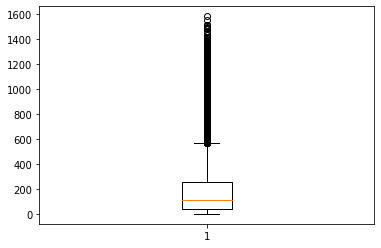

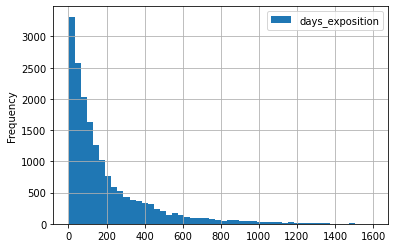

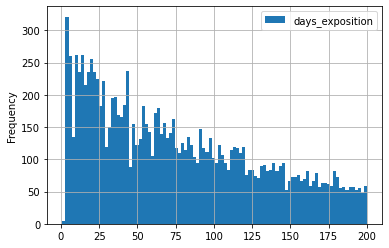

In [51]:
plt.boxplot(data_day['days_exposition'])
data_day.plot(y = 'days_exposition', kind = 'hist', bins = 50, grid = True, range = (1,1600))
data_day.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200)) #возьмём меньше

В обновлённых данных изменились показатели:

Среднее было 181 стало 191

Медиана была 95 стала 112

Диапазон дней продажи квартир теперь  1 - 600

Необходимо дождаться данных от коллег по поводу сроков публикации и уточнения о 7 и 30 днях.


**Задание 2 - "Какие факторы больше всего влияют на общую (полную) стоимость объекта?".**

**- Изучим зависимость цены  от общей площади квартиры.**

0.7632580817102217

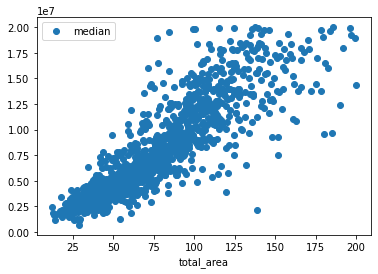

In [52]:
# Создадим сводную таблицу pivot_total_area
pivot_total_area = data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_total_area.columns = ['mean', 'count', 'median'] # Переименуем столбцы
pivot_total_area.plot(y = 'median', style = 'o') # Построим график точками

data['total_area'].corr(data['last_price']) # Вычислим корреляцию 


Коэффициент корреляции Пирсона 0,76. Связь сильная. Чем больше площадь квартиры, тем дороже стоимость квартиры.

**- Изучим зависимость цены от жилой площади квартиры.**

0.6375111960809093

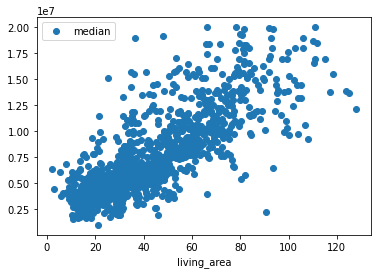

In [53]:
# Создадим сводную таблицу pivot_living_area
pivot_living_area = data.pivot_table(index = 'living_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_living_area.columns = ['mean', 'count', 'median'] # Переименуем столбцы
pivot_living_area.plot(y = 'median', style = 'o') # Построим график точками

data['living_area'].corr(data['last_price']) # Вычислим корреляцию 

Зависимость почти така же, как и от общей площади. Коэффициент корреляции 0,63. Связь средняя. Чем больше жилая площадь квартиры, тем возврастает цена квартиры.

**- Изучим зависимость цены от площади кухнию**


0.5712402947382251

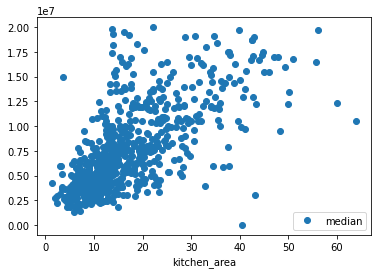

In [54]:
# Создадим сводную таблицу pivot_kitchen_area
pivot_kitchen_area = data.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_kitchen_area.columns = ['mean', 'count', 'median'] # Переименуем столбцы
pivot_kitchen_area.plot(y = 'median', style = 'o') # Построим график точками

data['kitchen_area'].corr(data['last_price']) # Вычислим корреляцию 

Коэффициент корреляции 0,57. Связь средняя. Чем больше площадь кухни квартиры, тем чуть выше стоимость квартиры.

**- Изучим зависимость цены от количества комнат.**

0.463878310098315

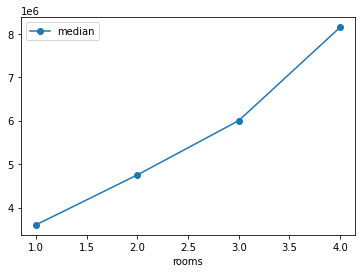

In [55]:
# Создадим сводную таблицу pivot_rooms
pivot_rooms = data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_rooms.columns = ['mean', 'count', 'median'] # Переименуем столбцы
pivot_rooms.plot(y = 'median', style = 'o-') # Построим график точками

data['rooms'].corr(data['last_price']) # Вычислим корреляцию 

Коэффициент корреляции 0,46. Связь средняя. Квартиры с 4 комнатами стоят дороже, чем однушки. 2х комнатные квартиры стоят дороде 1 комнатных.

**- Изучим зависимость цены от этажа, на котором расположена квартира (первый, последний, другой).**

                    mean  count   median
floor_type                              
другой      5.588210e+06  16378  4749000
первый      4.296865e+06   2791  3850000
последний   4.986152e+06   3097  4190000


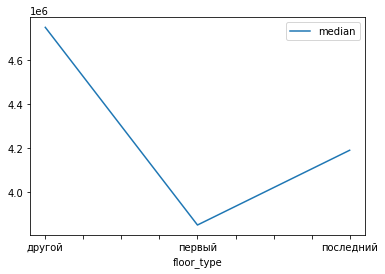

In [56]:
# Создадим сводную таблицу pivot_floor_type
pivot_floor_type = data.pivot_table(index = 'floor_type', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_floor_type.columns = ['mean', 'count', 'median'] # Переименуем столбцы
pivot_floor_type.plot(y = 'median') # Построим график
print(pivot_floor_type)


т.к. число квартир на других этажах превышает квартиры на первом и последнем этажах, можно сделать вывод, что квартиры на первом этаже стоят чуть дешевле, чем квартиры на последних этажах. Но, квартиры на последниъ этажах стоят дешевле, чем на каком либо другом.

**- Изучим зависимость цены от даты размещения (день недели).**

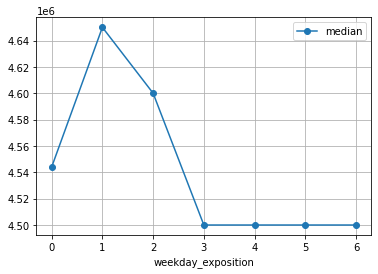

In [57]:
# Создадим сводную таблицу pivot_weekday_exposition
pivot_weekday_exposition = data.pivot_table(index = 'weekday_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_weekday_exposition.columns = ['mean', 'count', 'median'] # Переименуем столбцы
pivot_weekday_exposition.plot(y = 'median', style = 'o-', grid=True); # Построим график точками


Объявления выставленные в начале недели с более высокой стоимостью квартир. Объявления выложенные с четверга по вескресенье с самой низкой стоимостью.

Но, тут скорее всего связано с работой риэлторов, с помощью которых продают квартиры. Риэлторы могут не работать на выходных, понедельник - день планирования, а вторник и среда самые продуктивны дни.

**- Изучим зависимость цены от даты размещения (месяц).**

                          mean  count   median
month_exposition                              
4                 5.484679e+06   2267  4700000
9                 5.553121e+06   1871  4600000
11                5.404757e+06   2214  4600000
12                5.364686e+06   1545  4600000
3                 5.314147e+06   2453  4550000
2                 5.269255e+06   2482  4515000
1                 5.307631e+06   1400  4500000
7                 5.326426e+06   1590  4500000
8                 5.378485e+06   1648  4500000
10                5.348536e+06   2020  4500000
5                 5.269215e+06   1191  4450000
6                 5.060183e+06   1660  4300000


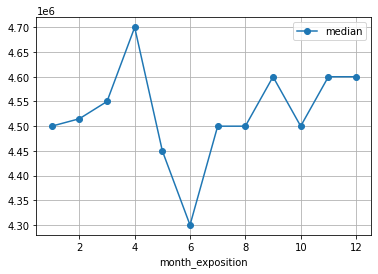

In [58]:
# Создадим сводную таблицу pivot_month_exposition
pivot_month_exposition = data.pivot_table(index = 'month_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_month_exposition.columns = ['mean', 'count', 'median'] # Переименуем столбцы
pivot_month_exposition.plot(y = 'median', style = 'o-', grid=True) # Построим график точками

print(pivot_month_exposition.sort_values('median', ascending = False))

Самая высокая стоимость квартир в апреле, самая низкая в июне и мае. Возможно, это связано с отпусками людей - июнь первый месяц лета, так же сказывается май, где пол месяца - это не рабочие дни.

**- Изучим зависимость цены от даты размещения (год).**

                         mean  count   median
year_exposition                              
2014             7.955265e+06    114  6325000
2015             5.963206e+06   1068  5095000
2019             5.648179e+06   2732  4960000
2018             5.217024e+06   8119  4500000
2016             5.313983e+06   2611  4400000
2017             5.261387e+06   7697  4400000


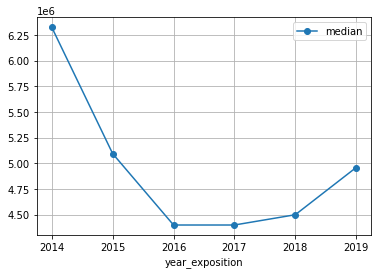

In [59]:
# Создадим сводную таблицу pivot_year_exposition
pivot_year_exposition = data.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_year_exposition.columns = ['mean', 'count', 'median'] # Переименуем столбцы
pivot_year_exposition.plot(y = 'median', style = 'o-', grid=True) # Построим график точками

print(pivot_year_exposition.sort_values('median', ascending = False))

С 2014 - 2016 стоимость квартир уменьшалась. С 2017 цена совсем чуть-чуть начала расти по сравнению 2016 г.

Причина - рост курса доллара в 2014-2015 гг, стоимость квартир упала.

**Задание 3 - "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений — постройте сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра".**

In [60]:
# Создадим сводную таблицу pivot_locality_name
pivot_locality_name = data.pivot_table(index = 'locality_name', values = 'price_per_square_meter', aggfunc= ['count', 'mean'])
# Переименуем столбцы
pivot_locality_name.columns = ['count', 'mean']
# Отсортируем кол-во  по возрастанию и сохраним 10 населённых пунктов
pivot_locality_name = pivot_locality_name.sort_values('count', ascending = False).head(10)
print(pivot_locality_name)


                 count           mean
locality_name                        
Санкт-Петербург  14601  108904.760983
Мурино             560   85522.593036
Кудрово            450   95151.880622
Шушары             434   78438.609562
Всеволожск         390   67217.765590
Пушкин             353  101982.315439
Колпино            334   75440.286916
Парголово          321   90479.242305
Гатчина            306   68797.701797
Выборг             234   58305.943547


In [61]:
# Найдём самую высокую и низкую стоимость
print(pivot_locality_name[pivot_locality_name['mean'] == pivot_locality_name['mean'].max()])
print(pivot_locality_name[pivot_locality_name['mean'] == pivot_locality_name['mean'].min()])

                 count           mean
locality_name                        
Санкт-Петербург  14601  108904.760983
               count          mean
locality_name                     
Выборг           234  58305.943547


**Итог:**

Самая высокая стоимость квадратного метра жилья из 10 населённых пунктов, с самым большим количеством объявлений - Санкт-Петербург. Самая низка - Выборг - 58 305 руб/м2.

В Санкт-Птербурге больше всего объявлений о продаже квартир, оно и не удивительно, т.к. это крупный город. Пушкин занимает 6 место по кол-ву объявлений, но при этом стоимость м2 - 108 905 руб.   

**Задание 4 - Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города — постройте график изменения средней цены для каждого километра от центра Петербурга.**


cityCenters_nearest
0.0      9248.333333
1.0     10242.587406
2.0      9723.035088
3.0      8515.983154
4.0      8954.500292
5.0      9148.420618
6.0      8383.687697
7.0      7934.286396
8.0      7915.096353
9.0      6399.525548
10.0     6054.801916
11.0     5895.037614
12.0     5708.686565
13.0     5969.225751
14.0     5554.358117
15.0     5672.677992
16.0     5263.822196
17.0     5171.324765
18.0     4884.326074
19.0     5067.515903
20.0     6097.429935
21.0     5516.834052
22.0     5367.840323
23.0     4754.587500
24.0     3890.686800
25.0     4052.839923
26.0     3973.012509
27.0     8300.000000
28.0     5026.428571
29.0     4236.666667
Name: last_price, dtype: float64


<AxesSubplot:xlabel='cityCenters_nearest'>

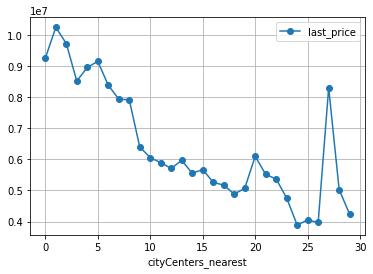

In [62]:
# Сделаем срез по Санкт-Петербургу и создадим сводную тпблицу pivot_km
pivot_km = data.query('locality_name == "Санкт-Петербург"').pivot_table(index = 'cityCenters_nearest', values = 'last_price', aggfunc = 'mean')
print(pivot_km['last_price']/1000) # для наглядности цены
pivot_km.plot(style = 'o-', grid=True)

**Итог:**

В центре города самая высокая стоимость квартир. В 2-3 км от центра цена снижается. В 4-7 км от центра города цена увеличивается - спальные районы, больше жидых домов, не все мечтают жить в центре. В 15 км находится аэропорт.Есть небольшой выброс на 27 км.  

### Общий вывод

Мы изучили данные сервиса Яндекс Недвижимость - обработали пропущенные значения,где это было возможно, заменили тип данных и избавились от уникальных значений в названиях населённых пунктах. 

Добавили в таблицу новые столбцы - ценка м2, размещение объявлений по месяцам, неделям и годам, тип этажа квартиры(«первый», «последний», «другой») и расстояние до центра города в км.

Провели анализ по списку параметров и выявили аномалии в данных высоты потолка, общей площади квартиры, количестве комнат, стоимости квартиры - все анамальные значении отбросили. Пропуски в днях публикации объявления, не заполняли, т.к. это говорит о том, что квартиру ещё не продали иобъявление не сняли с публикации.

Изучили, что средняя продажа квартиры занимает от 1 до 500 дней. Но на графиках выявлены дни снятия объявлений с публикации (условия сайта), которые нельзя считать днём продажи - 7,30,45,60 и 90 дней. Тут необходимо уточнение у сборщиков информации. Если данные аномалии подтверждаются и эти дни исключить из анализа, количество дней на продажу квартир увеличится 1 - 600.

Выявили, что на стоимость квартир больше всего влияет площадь и количество комнат, чем больше эти показатели, тем выше цена квартир. Квартиры на первом этаже стоят дешевле, чем квартиры на последниъ этажах на 10%. Заметили, что и время публикации так же влияет на стоимость - объявления размещённые во вторник, самый продуктивный день недели, стоят дорже, чем квартира опубликованная в воскресенье. В публикациях была замечена сезонность - квартиры опубликованные в мае - начале лета стоят дешевле, чем квартира выложенная в апреле. В анализе был отрезок 2014-2019 гг. Экономические проблемы и рост курса доллара в 2014-2015 гг так же сказался на стоимости квартир, лишь с 2017 г цена по немногу начала расти. И конечно, в центре города квартиры стоят дороже, чем на расстоянии 10 км от центра.

Провели анализ 10 населённых пунктов с самым большим количеством объявлений и выяснили, что самое дорогое жильё в Санкт-Петербурге - 108 905 руб/м2., а самая низкая цена в Выборге - 58 305 руб/м2.


